In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#загрузка данных
data = load_boston()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
#подготовка к разбиению данных
Y = df['target']
X = df[df.columns[:-1]]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#разбиение на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [9]:
#пробовались варианты глубина 5 и 7, на меньшей глубине лучше качество
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=7)

In [11]:
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=7)

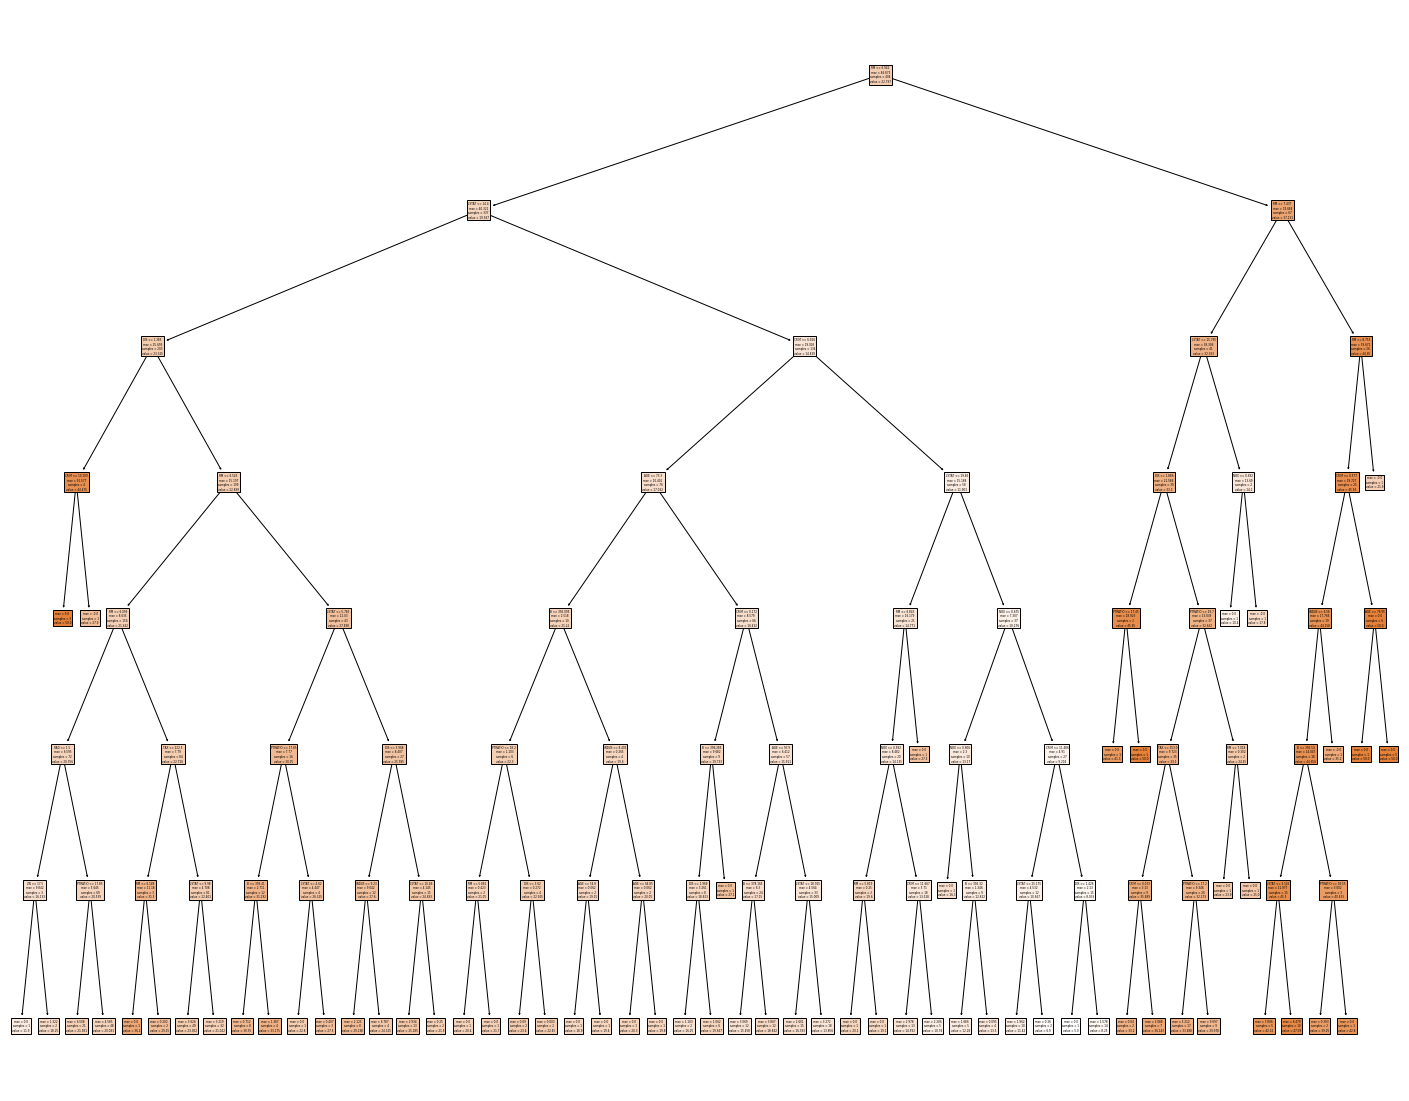

In [13]:
#попытка визуализации дерева
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=data.feature_names,  
                   class_names=data.target,
                   filled=True)#при глубине 7

In [21]:
#текстовый формат
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_0 <= 10.11
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_0 >  10.11
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- feature_8 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 17.50
|   |   |   |   |   |   |   |--- value: [11.90]
|   |   |   |   |   |   |--- feature_1 >  17.50
|   |   |   |   |   |   |   |--- value: [18.25]
|   |   |   |   |   |--- feature_8 >  1.50
|   |   |   |   |   |   |--- feature_10 <= 17.85
|   |   |   |   |   |   |   |--- value: [21.58]
|   |   |   |   |   |   |--- feature_10 >  17.85
|   |   |   |   |   |   |   |--- value: [20.08]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- feature_5 <= 6.15
|   |   |   |   |   |   |   |--- value: [36.20]
|   |   |   |   |

In [18]:
#при глубине 7
dtr.score(X_test, Y_test)

0.7180960860165753

In [19]:
dtr_ = DecisionTreeRegressor(max_depth=5)
dtr_.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

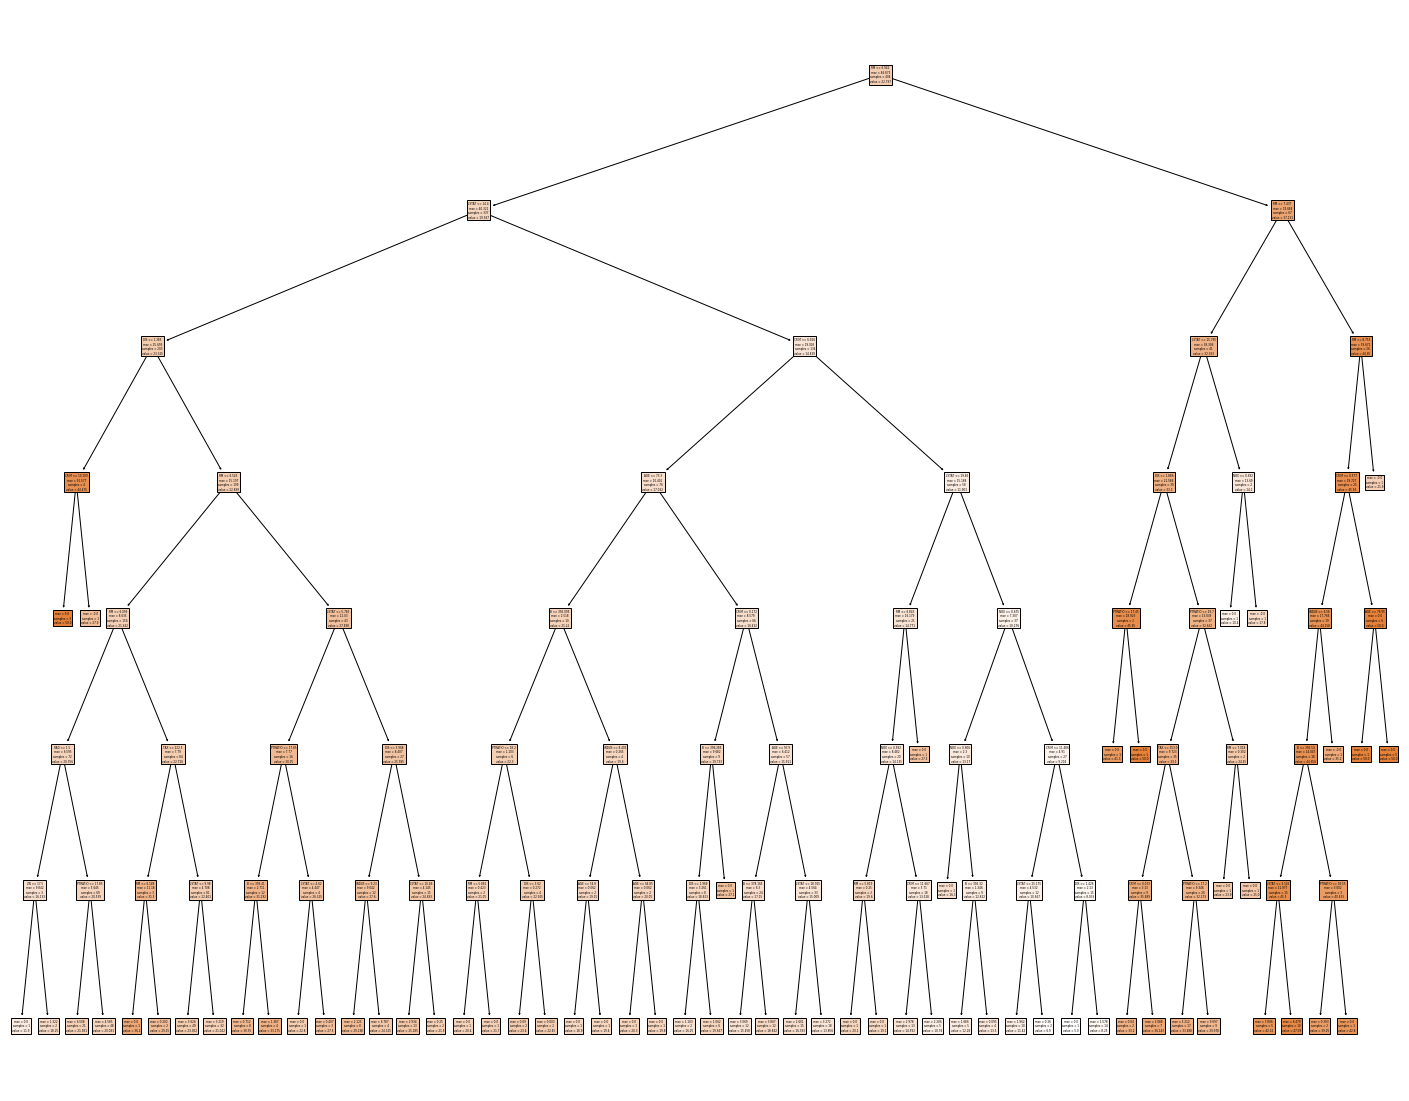

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=data.feature_names,  
                   class_names=data.target,
                   filled=True)

In [22]:
#текстоный формат
text_representation = tree.export_text(dtr_)
print(text_representation)

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_12 <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- feature_12 >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_5 <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- feature_5 >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- feature_5 >  6.54
|   |   |   |   |--- feature_12 <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- feature_12 >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- feature_12 >  14.40
|   |   |--- feature_0 <= 6.93
|   |   |   |--- feature_6 <= 73.30
|   |   |   |   |--- feature_11 <= 395.10
|   |   |   |   |   |--- value: [22.30]
|   |   |   |   |--- feature_11 >  395.10
|   |   |   |   |   |--- value: [19.60]
|   |   |   |--- feature_6 >  73.30
|   |   |   |   |--- feature_0 <= 0.17
|   |   |   |   |

In [23]:
#при глубине 5
dtr_.score(X_test, Y_test)

0.7937140365309365

In [24]:
#при типе float получается ошибка в обучении регрессии
Y_ = Y.astype('int')

#разбиение на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_, test_size = 0.2, random_state = 42)

In [25]:
#логистическая регрессия
log_reg = LogisticRegression()

In [26]:
log_reg.fit(X_train, Y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
log_reg.score(X_test, Y_test)

0.12745098039215685

In [30]:
#оптимизация, осталась L1
log_reg_2 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )

In [31]:
#при L1 было
log_reg_2.score(X_test, Y_test)

0.11764705882352941

In [29]:
#при L2
log_reg_2.score(X_test, Y_test)

0.049019607843137254